In [1]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


data dari https://www.kaggle.com/datasets/danofer/dbpedia-classes

In [5]:
df = pd.read_csv('DBP_wiki_data.csv')
df.head()

,text,l1,l2,l3,wiki_name,word_count
0,The 1994 Mindoro earthquake occurred on Novemb...,Event,NaturalEvent,Earthquake,1994_Mindoro_earthquake,59
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event,NaturalEvent,Earthquake,1917_Bali_earthquake,68
2,The 1941 Colima earthquake occurred on April 1...,Event,NaturalEvent,Earthquake,1941_Colima_earthquake,194
3,The 1983 Coalinga earthquake occurred on May 2...,Event,NaturalEvent,Earthquake,1983_Coalinga_earthquake,98
4,The 2013 Bushehr earthquake occurred with a mo...,Event,NaturalEvent,Earthquake,2013_Bushehr_earthquake,61


In [7]:
df['l1'].value_counts()

Agent             177341
Place              65128
Species            31149
Work               29832
Event              27059
SportsSeason        8307
UnitOfWork          2497
TopicalConcept      1115
Device               353
Name: l1, dtype: int64

In [8]:
df = df.drop(columns=['l2', 'l3', 'wiki_name', 'word_count'])
df.head()

,text,l1
0,The 1994 Mindoro earthquake occurred on Novemb...,Event
1,The 1917 Bali earthquake occurred at 06:50 loc...,Event
2,The 1941 Colima earthquake occurred on April 1...,Event
3,The 1983 Coalinga earthquake occurred on May 2...,Event
4,The 2013 Bushehr earthquake occurred with a mo...,Event


In [10]:
df.shape

(342781, 2)

In [11]:
df.text = df.text.apply(lambda x: x.lower())

In [12]:
category = pd.get_dummies(df.l1)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='l1')
df_baru.head()

,text,Agent,Device,Event,Place,Species,SportsSeason,TopicalConcept,UnitOfWork,Work
0,the 1994 mindoro earthquake occurred on novemb...,0,0,1,0,0,0,0,0,0
1,the 1917 bali earthquake occurred at 06:50 loc...,0,0,1,0,0,0,0,0,0
2,the 1941 colima earthquake occurred on april 1...,0,0,1,0,0,0,0,0,0
3,the 1983 coalinga earthquake occurred on may 2...,0,0,1,0,0,0,0,0,0
4,the 2013 bushehr earthquake occurred with a mo...,0,0,1,0,0,0,0,0,0


In [13]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]',' ',text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

In [15]:
df_baru['text'] = df_baru['text'].apply(clean_text)

In [16]:
df_baru.head()

,text,Agent,Device,Event,Place,Species,SportsSeason,TopicalConcept,UnitOfWork,Work
0,mindoro earthquake occurred november local tim...,0,0,1,0,0,0,0,0,0
1,bali earthquake occurred local time january ja...,0,0,1,0,0,0,0,0,0
2,colima earthquake occurred april utc local tim...,0,0,1,0,0,0,0,0,0
3,coalinga earthquake occurred may exactly utc c...,0,0,1,0,0,0,0,0,0
4,bushehr earthquake occurred moment magnitude a...,0,0,1,0,0,0,0,0,0


In [19]:
deskripsi = df_baru['text'].values
label = df_baru[['Agent', 'Device', 'Event', 'Place', 'Species', 'SportsSeason', 'TopicalConcept', 'UnitOfWork', 'Work']].values

In [20]:
from sklearn.model_selection import train_test_split
deskripsi_latih, deskripsi_test, label_latih, label_test = train_test_split(deskripsi, label, test_size=0.2)

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(deskripsi_latih) 
 
sekuens_latih = tokenizer.texts_to_sequences(deskripsi_latih)
sekuens_test = tokenizer.texts_to_sequences(deskripsi_test)
 
padded_latih = pad_sequences(sekuens_latih, padding='post',
maxlen=200,
truncating='post') 
padded_test = pad_sequences(sekuens_test, padding='post',
maxlen=200,
truncating='post')

In [22]:
padded_latih

array([[4450, 4669,   16, ...,    0,    0,    0],
       [ 313,  882,  235, ...,    0,    0,    0],
       [  70,  155,  205, ...,    0,    0,    0],
       ...,
       [ 882,   69,   59, ...,    0,    0,    0],
       [1547,  882,   76, ...,    0,    0,    0],
       [  67, 1512,  378, ...,    0,    0,    0]], dtype=int32)

In [23]:
padded_test

array([[ 882,  882, 1589, ...,    0,    0,    0],
       [ 882, 3407,   34, ...,    0,    0,    0],
       [ 882,  882,  148, ...,    0,    0,    0],
       ...,
       [ 882,  882,    4, ...,    0,    0,    0],
       [ 882,  882,    4, ...,    0,    0,    0],
       [ 882,  882,  882, ...,    0,    0,    0]], dtype=int32)

In [27]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=200),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           80000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 9)                 585       
                                                                 
Total params: 117,897
Trainable params: 117,897
Non-trainable params: 0
_________________________________________________________________


In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [28]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
8570/8570 - 989s - loss: 1.3375 - accuracy: 0.5249 - val_loss: 1.4377 - val_accuracy: 0.5194 - 989s/epoch - 115ms/step
Epoch 2/30
8570/8570 - 986s - loss: 1.1863 - accuracy: 0.5670 - val_loss: 1.2327 - val_accuracy: 0.5886 - 986s/epoch - 115ms/step
Epoch 3/30
8570/8570 - 988s - loss: 0.4025 - accuracy: 0.8745 - val_loss: 0.1428 - val_accuracy: 0.9624 - 988s/epoch - 115ms/step
Epoch 4/30

Akurasi telah mencapai >90%!
8570/8570 - 993s - loss: 0.0858 - accuracy: 0.9770 - val_loss: 0.0768 - val_accuracy: 0.9792 - 993s/epoch - 116ms/step


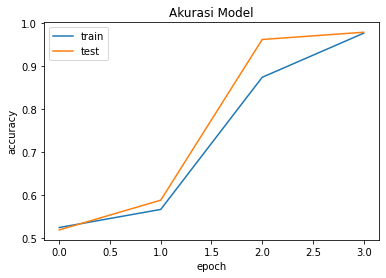

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

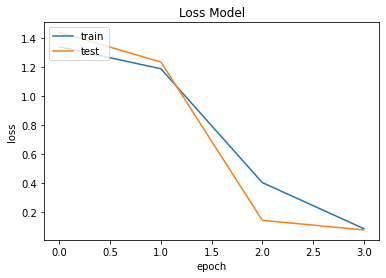

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()